Dataset : https://www.kaggle.com/ronitf/heart-disease-uci

# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hanam\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanam\Anaconda3\

# Data Wrangling

In [2]:
df_heart = pd.read_csv('heartdisease.csv')

In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [5]:
df_heart['ca'] = df_heart.ca.fillna(df_heart.ca.median())

In [6]:
df_heart['thal'] = df_heart.ca.fillna(df_heart.thal.median())

In [7]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# mengubah kolom jenis kelamin 0 = perempuan, 1 = laki-laki
 df_heart['sex'] = df_heart.sex.map({0:'female', 1:'male'})

In [9]:
# mengubah penyakit jantung 0 = tidak 1 = ya
df_heart['target'] = df_heart.target.map({0:0, 1:1, 2:1, 3:1, 4:1})

In [10]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 33.3+ KB


In [11]:
df_heart.corr()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.365323,0.223120
cp,0.104139,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.233117,0.414446
trestbps,0.284946,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.097528,0.150825
chol,0.208950,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.123726,0.085164
fbs,0.118530,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.140764,0.025264
restecg,0.148868,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.131749,0.169202
thalach,-0.393806,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.265699,-0.417167
exang,0.091661,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.145788,0.431894
oldpeak,0.203805,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.301067,0.424510
slope,0.161770,0.152050,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.110803,0.110803,0.339213


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'thal'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

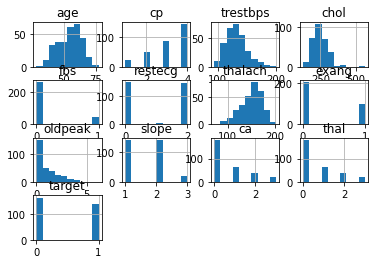

In [12]:
df_heart.hist()

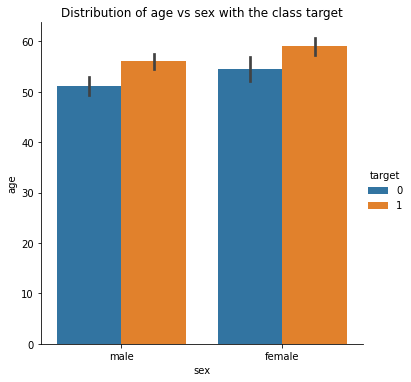

In [13]:
# persebaran distribusi umur vs jenis kelamin pada class target
sns.catplot(kind='bar', data = df_heart, y='age',x='sex', hue='target')
plt.title('Distribution of age vs sex with the class target')
plt.show()

In [14]:
# mengubah kolom jenis kelamin 0 = perempuan, 1 = laki-laki
df_heart['sex'] = df_heart.sex.map({'female':0, 'male':1})

# Data Preprocessing

In [15]:
features = df_heart.drop('target', axis=1).values

In [16]:
target = df_heart['target'].values

In [17]:
target = to_categorical(target)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=2)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242, 2), (61, 2))

In [20]:
n_cols = features.shape[1]
n_cols

13

# Model 1

In [21]:
# define model
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(n_cols,)))
model.add(Dense(2, activation='softmax'))

# Compile Model

In [22]:
# compile model
model.compile(optimizer= "adam",loss = "categorical_crossentropy",metrics=["accuracy"])

# Train model

In [23]:
# train model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150)

Train on 242 samples, validate on 61 samples
Epoch 1/150
242/242 [==============================] - 0s 885us/step - loss: 7.5751 - acc: 0.5207 - val_loss: 6.3170 - val_acc: 0.5738
Epoch 2/150
242/242 [==============================] - 0s 95us/step - loss: 5.9509 - acc: 0.4835 - val_loss: 6.3337 - val_acc: 0.2951
Epoch 3/150
242/242 [==============================] - 0s 134us/step - loss: 5.6948 - acc: 0.4587 - val_loss: 5.3213 - val_acc: 0.4098
Epoch 4/150
242/242 [==============================] - 0s 111us/step - loss: 5.1609 - acc: 0.5083 - val_loss: 5.5712 - val_acc: 0.5902
Epoch 5/150
242/242 [==============================] - 0s 157us/step - loss: 4.7067 - acc: 0.5372 - val_loss: 5.0419 - val_acc: 0.4098
Epoch 6/150
242/242 [==============================] - 0s 109us/step - loss: 4.4185 - acc: 0.5083 - val_loss: 4.2639 - val_acc: 0.4426
Epoch 7/150
242/242 [==============================] - 0s 91us/step - loss: 3.9310 - acc: 0.5579 - val_loss: 3.9927 - val_acc: 0.4918
Epoch 8/150


Epoch 61/150
242/242 [==============================] - 0s 95us/step - loss: 0.6896 - acc: 0.7314 - val_loss: 0.5637 - val_acc: 0.7541
Epoch 62/150
242/242 [==============================] - 0s 120us/step - loss: 0.6734 - acc: 0.7479 - val_loss: 0.9972 - val_acc: 0.6066
Epoch 63/150
242/242 [==============================] - 0s 124us/step - loss: 0.8055 - acc: 0.7231 - val_loss: 0.5251 - val_acc: 0.7705
Epoch 64/150
242/242 [==============================] - 0s 95us/step - loss: 0.6288 - acc: 0.7810 - val_loss: 0.7412 - val_acc: 0.7705
Epoch 65/150
242/242 [==============================] - 0s 107us/step - loss: 0.7161 - acc: 0.7066 - val_loss: 0.5873 - val_acc: 0.7869
Epoch 66/150
242/242 [==============================] - 0s 111us/step - loss: 0.6089 - acc: 0.7851 - val_loss: 0.7777 - val_acc: 0.6721
Epoch 67/150
242/242 [==============================] - 0s 111us/step - loss: 0.6870 - acc: 0.7397 - val_loss: 0.5497 - val_acc: 0.6885
Epoch 68/150
242/242 [============================

Epoch 121/150
242/242 [==============================] - ETA: 0s - loss: 0.6558 - acc: 0.718 - 0s 91us/step - loss: 0.6679 - acc: 0.7521 - val_loss: 0.7354 - val_acc: 0.7541
Epoch 122/150
242/242 [==============================] - 0s 95us/step - loss: 0.5652 - acc: 0.7645 - val_loss: 0.4665 - val_acc: 0.7869
Epoch 123/150
242/242 [==============================] - 0s 128us/step - loss: 0.5084 - acc: 0.8017 - val_loss: 0.6308 - val_acc: 0.7213
Epoch 124/150
242/242 [==============================] - 0s 107us/step - loss: 0.4521 - acc: 0.8264 - val_loss: 0.4991 - val_acc: 0.7213
Epoch 125/150
242/242 [==============================] - 0s 124us/step - loss: 0.5203 - acc: 0.8140 - val_loss: 0.6626 - val_acc: 0.7049
Epoch 126/150
242/242 [==============================] - 0s 95us/step - loss: 0.4896 - acc: 0.7851 - val_loss: 0.5192 - val_acc: 0.7377
Epoch 127/150
242/242 [==============================] - 0s 107us/step - loss: 0.4476 - acc: 0.8388 - val_loss: 0.4997 - val_acc: 0.7869
Epoch 

In [24]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, valid: %.3f' % (train_acc,valid_acc))

Train: 0.839, valid: 0.738


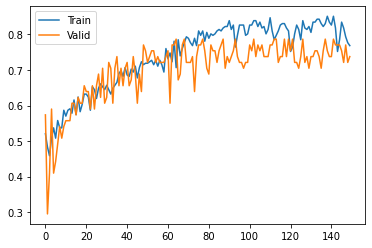

In [25]:
plt.plot(history.history['acc'],label='Train')
plt.plot(history.history['val_acc'], label='Valid')
plt.legend()
plt.show()

# Model 1.2

In [26]:
# define model
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(n_cols,)))
model.add(Dense(2, activation='softmax'))

In [27]:
# compile model
model.compile(optimizer= "adam",loss = "categorical_crossentropy",metrics=["accuracy"])

In [28]:
# train model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150)

Train on 242 samples, validate on 61 samples
Epoch 1/150
242/242 [==============================] - 0s 993us/step - loss: 7.0953 - acc: 0.5248 - val_loss: 4.7062 - val_acc: 0.6721
Epoch 2/150
242/242 [==============================] - 0s 111us/step - loss: 4.9429 - acc: 0.6074 - val_loss: 2.4950 - val_acc: 0.7377
Epoch 3/150
242/242 [==============================] - 0s 95us/step - loss: 2.9107 - acc: 0.6405 - val_loss: 2.1705 - val_acc: 0.7213
Epoch 4/150
242/242 [==============================] - 0s 99us/step - loss: 3.0735 - acc: 0.6281 - val_loss: 2.0193 - val_acc: 0.7377
Epoch 5/150
242/242 [==============================] - 0s 95us/step - loss: 2.7894 - acc: 0.6405 - val_loss: 1.7268 - val_acc: 0.7377
Epoch 6/150
242/242 [==============================] - 0s 124us/step - loss: 2.7136 - acc: 0.6612 - val_loss: 1.7055 - val_acc: 0.7377
Epoch 7/150
242/242 [==============================] - 0s 99us/step - loss: 2.6125 - acc: 0.6694 - val_loss: 1.6967 - val_acc: 0.7377
Epoch 8/150
24

242/242 [==============================] - 0s 112us/step - loss: 0.6939 - acc: 0.7355 - val_loss: 0.4496 - val_acc: 0.8033
Epoch 62/150
242/242 [==============================] - 0s 99us/step - loss: 0.6941 - acc: 0.7190 - val_loss: 0.4721 - val_acc: 0.7541
Epoch 63/150
242/242 [==============================] - 0s 115us/step - loss: 0.6515 - acc: 0.7273 - val_loss: 0.4362 - val_acc: 0.8197
Epoch 64/150
242/242 [==============================] - 0s 120us/step - loss: 0.5869 - acc: 0.7355 - val_loss: 0.4409 - val_acc: 0.7869
Epoch 65/150
242/242 [==============================] - 0s 95us/step - loss: 0.5820 - acc: 0.7355 - val_loss: 0.4420 - val_acc: 0.7705
Epoch 66/150
242/242 [==============================] - 0s 128us/step - loss: 0.5590 - acc: 0.7397 - val_loss: 0.4290 - val_acc: 0.8033
Epoch 67/150
242/242 [==============================] - 0s 132us/step - loss: 0.5464 - acc: 0.7397 - val_loss: 0.4296 - val_acc: 0.7869
Epoch 68/150
242/242 [==============================] - 0s 160u

242/242 [==============================] - 0s 103us/step - loss: 0.3978 - acc: 0.8347 - val_loss: 0.4340 - val_acc: 0.7869
Epoch 122/150
242/242 [==============================] - 0s 82us/step - loss: 0.4032 - acc: 0.8264 - val_loss: 0.4712 - val_acc: 0.7869
Epoch 123/150
242/242 [==============================] - 0s 132us/step - loss: 0.4077 - acc: 0.8223 - val_loss: 0.4661 - val_acc: 0.8033
Epoch 124/150
242/242 [==============================] - 0s 99us/step - loss: 0.4055 - acc: 0.8264 - val_loss: 0.4764 - val_acc: 0.7705
Epoch 125/150
242/242 [==============================] - 0s 103us/step - loss: 0.4014 - acc: 0.8347 - val_loss: 0.4357 - val_acc: 0.8033
Epoch 126/150
242/242 [==============================] - 0s 87us/step - loss: 0.4298 - acc: 0.8264 - val_loss: 0.4347 - val_acc: 0.7869
Epoch 127/150
242/242 [==============================] - 0s 95us/step - loss: 0.4255 - acc: 0.8140 - val_loss: 0.4910 - val_acc: 0.7869
Epoch 128/150
242/242 [==============================] - 0s

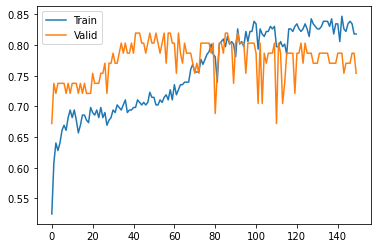

In [29]:
plt.plot(history.history['acc'],label='Train')
plt.plot(history.history['val_acc'], label='Valid')
plt.legend()
plt.show()